In [24]:
# Get the data for expeirment
import sklearn
import seaborn as sns
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

In [4]:
# Read the data set
df = pd.read_csv('Data/FES/Raw/data_swt_iee_usp_2020.csv', sep=';', header=0)

In [13]:
# The weather sensor data should be the input data
print(len(df))
df

224044


,Log Time,SN#,Software rev,opversion,Inv Time,watt-hours,Voltage In,Voltage DC Bus,Voltage L1,Voltage L2,...,Event count,Last event code,Event status,Event value,Turbine status,Grid status,System status,Slave Status,Access Status,Timer
0,"2020:01:06:10:11:13,058",107605,202,300,1578290828,723603,22.5,313.6,128.6,129.1,...,10991,111,0,5996,1,0,0,32768,0,0
1,"2020:01:06:10:12:39,731",107605,202,300,1578290917,723602,22.5,314.4,128.6,128.7,...,10993,107,2,5996,1,0,0,32768,2,0
2,"2020:01:06:10:13:22,821",107605,202,300,1578290956,723602,22.5,313.3,128.6,128.5,...,10993,107,2,5996,1,0,0,32768,2,0
3,"2020:01:06:10:14:33,672",107605,202,300,1578291027,723602,22.5,314.0,129.0,129.1,...,10993,107,2,5996,1,0,0,32768,2,0
4,"2020:01:06:10:15:01,252",107605,202,300,1578291059,723602,22.5,314.0,129.0,128.9,...,10993,107,2,5996,1,0,0,32768,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224039,"2020:12:07:11:37:00,649",107605,202,300,1607322824,1032755,22.5,308.1,129.7,131.4,...,11670,107,2,0,33,4096,0,0,2,0
224040,"2020:12:07:11:38:00,036",107605,202,300,1607322884,1032755,20.3,208.4,5.2,6550.9,...,11672,111,0,654,35,5381,1024,0,2,298
224041,"2020:12:21:16:25:39,118",107605,202,300,1608549653,1032755,4.3,311.6,130.6,131.9,...,11673,100,0,0,35,4096,1024,0,0,298
224042,"2020:12:21:16:26:00,436",107605,202,300,1608549674,1032755,10.8,310.7,130.4,131.7,...,11674,107,2,0,35,4096,1024,0,2,277


In [6]:
# Check all columns, some are not instantly understandable
df.columns

Index(['Log Time', 'SN#', 'Software rev', 'opversion', 'Inv Time',
       'watt-hours', 'Voltage In', 'Voltage DC Bus', 'Voltage L1',
       'Voltage L2', 'voltage rise', 'min v from rpm', 'Current out',
       'Power out', 'Power reg', 'Power max', 'Line Frequency',
       'Inverter Frequency', 'Line Resistance', 'RPM', 'Windspeed (ref)',
       'TargetTSR', 'Ramp RPM', 'Boost pulswidth', 'Max BPW',
       'current amplitude', ' T1', 'T2', 'T3', 'Event count',
       'Last event code', 'Event status', 'Event value', 'Turbine status',
       'Grid status', 'System status', 'Slave Status', 'Access Status',
       'Timer'],
      dtype='object')

In [40]:
column_to_use = [
    'Voltage In', 'Voltage DC Bus', 'Voltage L1',
    'Voltage L2', 
    'Power out',
    'Inverter Frequency', 'Line Resistance', 'RPM', 'Windspeed (ref)',
    'Ramp RPM'
]

In [41]:
# No null values
print(df.isnull().sum())

df_processed = df[column_to_use]

Log Time              0
SN#                   0
Software rev          0
opversion             0
Inv Time              0
watt-hours            0
Voltage In            0
Voltage DC Bus        0
Voltage L1            0
Voltage L2            0
voltage rise          0
min v from rpm        0
Current out           0
Power out             0
Power reg             0
Power max             0
Line Frequency        0
Inverter Frequency    0
Line Resistance       0
RPM                   0
Windspeed (ref)       0
TargetTSR             0
Ramp RPM              0
Boost pulswidth       0
Max BPW               0
current amplitude     0
 T1                   0
T2                    0
T3                    0
Event count           0
Last event code       0
Event status          0
Event value           0
Turbine status        0
Grid status           0
System status         0
Slave Status          0
Access Status         0
Timer                 0
dtype: int64


In [42]:
df_processed

,Voltage In,Voltage DC Bus,Voltage L1,Voltage L2,Power out,Inverter Frequency,Line Resistance,RPM,Windspeed (ref),Ramp RPM
0,22.5,313.6,128.6,129.1,0,59.90,275,0,0,330
1,22.5,314.4,128.6,128.7,0,59.91,275,0,0,330
2,22.5,313.3,128.6,128.5,0,60.08,275,0,0,330
3,22.5,314.0,129.0,129.1,0,59.93,275,0,0,330
4,22.5,314.0,129.0,128.9,0,59.94,275,0,0,330
...,...,...,...,...,...,...,...,...,...,...
224039,22.5,308.1,129.7,131.4,0,60.05,947,0,0,232
224040,20.3,208.4,5.2,6550.9,0,60.00,947,0,0,232
224041,4.3,311.6,130.6,131.9,0,59.91,0,0,0,327
224042,10.8,310.7,130.4,131.7,0,59.93,30,0,0,297


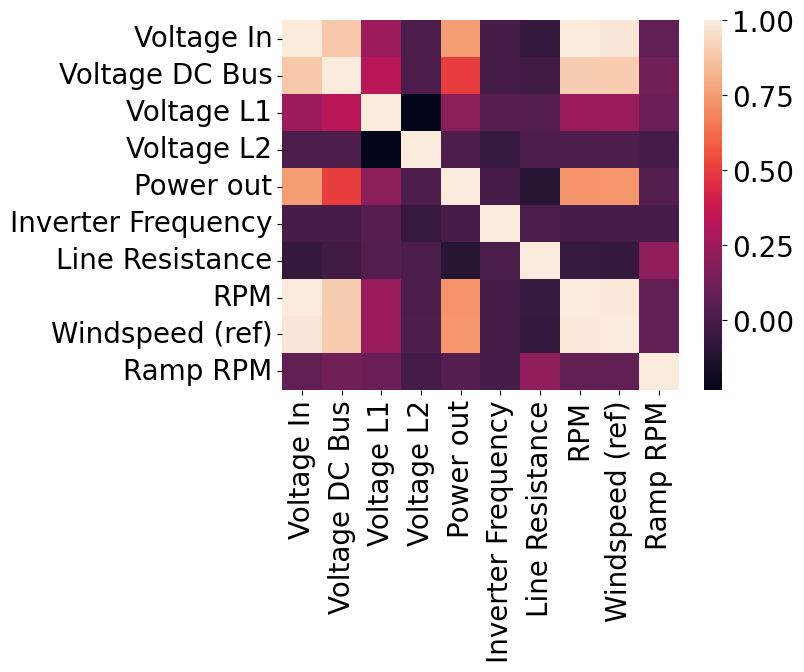

In [43]:
_ = sns.heatmap(df_processed.corr())

In [44]:
df_processed.to_csv('Data\FES\processed_small_wind_turbine.csv', sep = ',', index = False)

In [45]:
# Read the processeed data
data = pd.read_csv('Data/FES/processed_small_wind_turbine.csv')

x = data.drop(columns=['Power out'])
y = data['Power out']

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [47]:
x_train.to_csv('Data/FES/small_wind_turbine_x_train.csv', sep = ',', index = False)
x_test.to_csv('Data/FES/small_wind_turbine_x_test.csv', sep = ',', index = False)
y_train.to_csv('Data/FES/small_wind_turbine_y_train.csv', sep = ',', index = False)
y_test.to_csv('Data/FES/small_wind_turbine_y_test.csv', sep = ',', index = False)